In [19]:
#reading scv
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("bestsellers with categories.csv")

In [20]:
#changing columns names
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [21]:
#head
print(data.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [22]:
#shape
print(pd.unique(data["name"]).size)
#Про скільки книг зберігає дані датасет? Відповідь: 351 унікальна книга.

351


In [23]:
#counting nulls
print(data.isna().sum())
#Чи є в якихось змінних пропуски? Відповідь: Ні

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [24]:
#unique genres
print(pd.unique(data["genre"]))
#Які є унікальні жанри? Відповідь: Fiction, Non Fiction

['Non Fiction' 'Fiction']


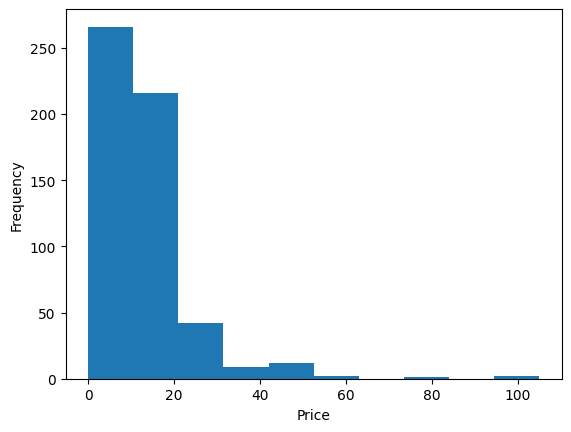

In [26]:
#diagram
data["price"].plot(kind='hist')
plt.xlabel("Price")
plt.show()

In [27]:
#finding maximum, minimum, mean and median prices
print(data["price"].max(), data["price"].min(), data["price"].mean(), data["price"].median())
#Максимальна ціна? Відповідь: 105
#Мінімальна ціна? Відповідь: 0
#Середня ціна? Відповідь: 13.1
#Медіанна ціна? Відповідь: 11

105 0 13.1 11.0


In [28]:
#highest rating
print(data["user_rating"].max(), pd.unique(data[data["user_rating"]>=data["user_rating"].max()]["name"]).size)
#Який рейтинг у датасеті найвищий? Відповідь: 4.9
#Скільки книг мають такий рейтинг? Відповідь: 28

4.9 28


In [29]:
#The most reviewed
print(data[data["reviews"]>=data["reviews"].max()])
#Яка книга має найбільше відгуків? Відповідь: "Where the Crawdads Sing" by Delia Owens

                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


In [30]:
#The most expensive in 2015
data_2015 = data[data["year"]==2015]
print(data_2015[data_2015["price"]==data_2015["price"].max()])
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
#Відповідь: "Publication Manual of the American Psychological Association, 6th Edition"

                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


In [31]:
#fiction in 2010
print(data[(data["genre"]=="Fiction") & (data["year"]==2010)].shape)
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20

(20, 7)


In [32]:
#rating 4.9 in 2010 and 2011
print(data[(data["user_rating"]==4.9) & ((data["year"]==2010) | (data["year"]==2011))].shape)
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1

(1, 7)


In [33]:
#sorting by price
data_2015 = data_2015[data_2015["price"]<8].sort_values("price", ascending=True)
print(data_2015.tail(n=1))
#Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10) by Jeff Kinney

                                      name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [34]:
#prices for genre
genres_data = data.groupby("genre")
genres_data = genres_data["price"].agg(min="min", max="max")
print(genres_data)
#Максимальна ціна для жанру Fiction: Відповідь 82
#Мінімальна ціна для жанру Fiction: Відповідь 0
#Максимальна ціна для жанру Non Fiction: Відповідь 105
#Мінімальна ціна для жанру Non Fiction: Відповідь 0

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [35]:
#authors books
authors_books_data = data.groupby(["author"])
authors_books_data = authors_books_data.agg(number=('name', pd.Series.count))
max_number = authors_books_data["number"].max()
print(authors_books_data.shape, authors_books_data[authors_books_data["number"]==max_number])
#Якої розмірності вийшла таблиця? Відповідь: (248, 1)
#Який автор має найбільше книг? Відповідь: Jeff Kinney
#Скільки книг цього автора? Відповідь: 12

(248, 1)              number
author             
Jeff Kinney      12


In [36]:
#authors rating
authors_rating_data = data.groupby("author")
authors_rating_data = authors_rating_data["user_rating"].agg(user_rating='mean')
min_rating = authors_rating_data["user_rating"].min()
print(min_rating, authors_rating_data[authors_rating_data["user_rating"]==min_rating])
#У якого автора середній рейтинг мінімальний? Відповідь: 3.9
#Який у цього автора середній рейтинг? Відповідь: Donna Tartt

3.9              user_rating
author                  
Donna Tartt          3.9


In [37]:
#concatenating and sorting
authors_data = pd.concat([authors_books_data, authors_rating_data], axis=1)
authors_data.sort_values(["number", "user_rating"], ascending=True)
print(authors_data.head(n=1))
#Який автор перший у списку? Відповідь: Abraham Verghese

                  number  user_rating
author                               
Abraham Verghese       2          4.6


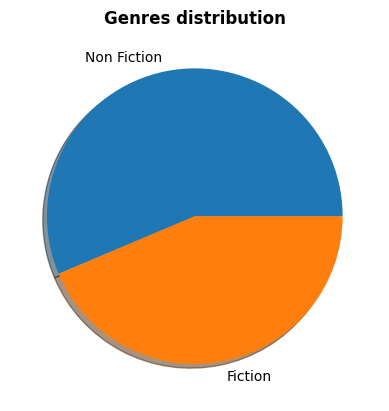

In [39]:
#plotting genres
genres_data = data["genre"].value_counts()
plt.pie(genres_data, labels=genres_data.index, shadow=True)
plt.title("Genres distribution", fontweight="bold")
plt.show()

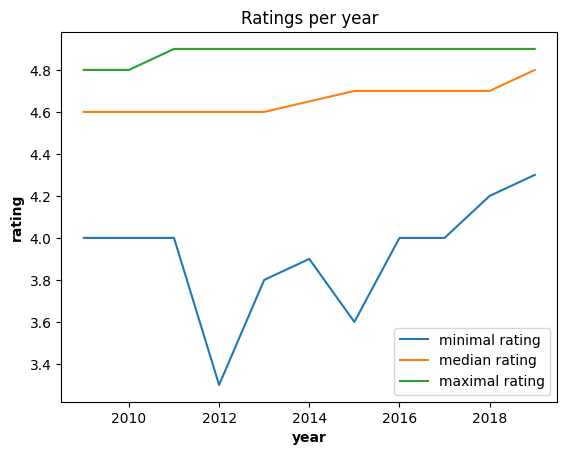

In [51]:
#plotting ratings each year
#in theory it might be able to help understand quality of books each year. At least at the very top.
#it's not even a theory. It is a hypothesis
year_rating_data = data.groupby("year")
year_rating_data = year_rating_data["user_rating"].agg(min_rating='min', median_rating='median', max_rating='max')
fig, axs = plt.subplots()
axs.plot(year_rating_data.index, year_rating_data["min_rating"], label="minimal rating")
axs.plot(year_rating_data.index, year_rating_data["median_rating"], label="median rating")
axs.plot(year_rating_data.index, year_rating_data["max_rating"], label="maximal rating")
plt.xlabel("year", fontweight="demi")
plt.ylabel("rating", fontweight="demi")
plt.title("Ratings per year")
plt.legend()
plt.show()
#Hypothesis is most likely incorect. Median rating in top 50 remains relatively stable
#even though minimal dropped as low as 3.3.
#would like to see if there is a correlation between minimal rating in top 50 and overall average or median.

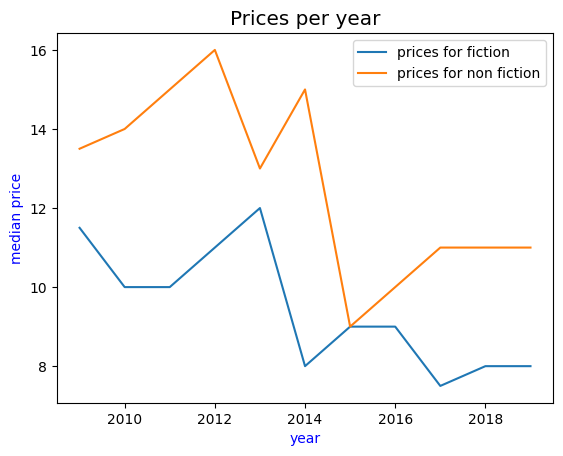

In [54]:
#plotting prices
fiction_prices_data = data[data["genre"]=="Fiction"]
fiction_prices_data = fiction_prices_data.groupby("year")
fiction_prices_data = fiction_prices_data["price"].agg(price='median')
non_fiction_prices_data = data[data["genre"]=="Non Fiction"]
non_fiction_prices_data = non_fiction_prices_data.groupby("year")
non_fiction_prices_data = non_fiction_prices_data["price"].agg(price='median')
fig, axs = plt.subplots()
axs.plot(fiction_prices_data.index, fiction_prices_data, label="prices for fiction")
axs.plot(non_fiction_prices_data.index, non_fiction_prices_data, label="prices for non fiction")
plt.xlabel("year", color="blue")
plt.ylabel("median price", color="blue")
plt.title("Prices per year", fontsize='x-large')
plt.legend()
plt.show()